In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Python for Lean Six Sigma - Chi-Square Test

In [7]:
# Import Data
df_hub = pd.read_excel('df_hub.xlsx')

# replace column names
print("{:,} records".format(len(df_hub)))
df_hub.head()

269 records


,Shipment,Driver,HUB
0,1,D1,SOUTH
1,2,D1,SOUTH
2,3,D2,SOUTH
3,4,D3,SOUTH
4,5,D2,SOUTH


### Bar plot

In [8]:
SMALL_SIZE = 8
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

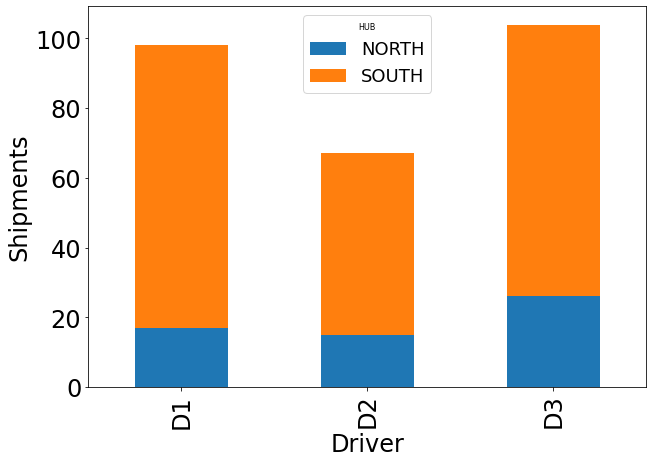

In [9]:
df_count = df_hub.groupby(['Driver', 'HUB'])['Shipment'].count().unstack().fillna(0)
df_count.plot(figsize=(10,7), kind="bar", stacked=True)
plt.ylabel('Shipments')
plt.show()

#### Perform cross tab

In [10]:
# Cross Tab 
df_xtab = pd.crosstab(df_hub.HUB, df_hub.Driver,  rownames=['index'], colnames=['Driver'])
df_xtab['All'] = df_xtab.sum(axis = 1)
# Transpose cross tab
df_xtabt = pd.crosstab(df_hub.Driver, df_hub.HUB,  rownames=['index'], colnames=['Hub'])
df_xtabt['All'] = df_xtabt.sum(axis = 1)

# Percentage by HUB
df_hubperc = (100 * df_xtab/df_xtab.sum(axis = 0)).round(2).reset_index()
# Percentage by Driver
df_drivperc= (100 * df_xtabt/df_xtabt.sum(axis = 0)).round(2).reset_index().T

df_xtab.to_csv('df_cross_tab.csv')
df_xtab

Driver,D1,D2,D3,All
index,,,,
NORTH,17,15,26,58
SOUTH,81,52,78,211


In [12]:
# Percentage by HUB
df_hubperc = (100 * df_xtab/df_xtab.sum(axis = 0)).round(2).reset_index()
df_hubperc.to_csv('df_hubperc.csv')
df_hubperc

Driver,index,D1,D2,D3,All
0,NORTH,17.35,22.39,25.0,21.56
1,SOUTH,82.65,77.61,75.0,78.44


#### Pearson’s Chi-Square Test

In [13]:
from scipy.stats import chi2_contingency
  
# Create the contigency table
data = []
for col in ['D1', 'D2', 'D3']:
    data.append(df_xtab[col].values)
stat, p, dof, expected = chi2_contingency(data)

print("p-value: " + str(p))

p-value: 0.4099628998904613
